### Binary search

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
def generate(k, kind='randint'):
    # Generate a sorted array of length k
    if kind=='randint':
        return np.sort(np.random.randint(size=k, low=0, high=k))
    if kind=='unique':
        return np.array(list(range(k)))

print(generate(10))
print(generate(10, 'unique'))

[0 1 1 2 3 5 7 8 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# With recursion

def bsr(nums,token,l=0,r=None):
    """Binary search, recursive."""
    if l==r:
        return l
    if r is None:
        r = len(nums)-1
    m = (l+r) // 2
    if token>nums[m]:
        l = m+1
    else:
        r = m
    return bsr(nums,token,l,r)    

x = generate(10)
print(x)
bsr(x,x[5])

[0 0 0 0 1 2 3 3 4 6]


5

In [25]:
# With a loop (no recursion)

def bsl(nums, target):
    """Binary search, loop."""
    l = 0
    r = len(nums)-1
    while l<r:
        m = (l+r)//2
        if target>nums[m]:  # If you do >= instead of > here, you'll lose a match, and enter inf loop
            l = m+1         # This moving up is critical to avoid inf loop with r=l+1 and l<x<r
        else:
            r = m           # Note that r is always above the element of interest
    return l

# print(bsl([1,2,4,6,7],6))

# Binary search always finds an element that is == or > than the target
for i in range(7):
    x = i/2 - 0.5
    print(x, bsl([0,1,2], x))

-0.5 0
0.0 0
0.5 1
1.0 1
1.5 2
2.0 2
2.5 2


In other words, here's the logic of binary search:

* if x < all elements, return 0
* if x is in the list, return the index
* if x is in-between elements, return the first element above x
* if x > all elements, return length (aka last+1)

Because of how binary search handles out-of-range, in case of imprecise search, the last condition should be considered separately. For the first one, you can still claim that BS returnes the smallest element >= x, so you can just handle cases of `x==nums[i]` and `x<nums[i]` separately, and you're fine.

### Now some bechmarking tests

In [5]:
def ls(nums,token):
    """Linear search, for benchmarking purposes."""
    i = 0
    while nums[i]<token:
        i += 1
    return i

ls(x,x[5])

3

In [31]:
ntrials = 5000
maxrowlen = 25
f = [ls, bsr, bsl]
names = ['Linear', 'Binary recursive', 'Binary loop']

times = np.zeros((maxrowlen,len(f)))
x = generate(rowlen, 'unique')
for i_f in range(len(f)):
    for rowlen in range(1,maxrowlen):
        tic = time.time()
        for itrial in range(ntrials):
            for i in range(rowlen):
                f[i_f](x,x[i])
        times[rowlen,i_f] = time.time()-tic

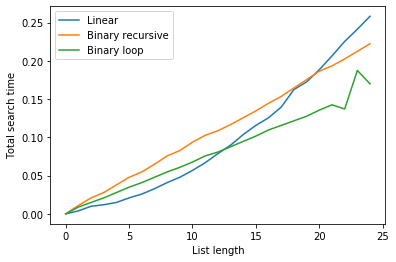

In [32]:
plt.plot(times);
plt.legend(labels=names);
plt.xlabel('List length');
plt.ylabel('Total search time');

**Observation:** For uniformly distributed search tokens, and unique elements, linear search is better than binary for rows shorter than 12 or so (in case of binary search coded as a loop), and up to rows of about 20 if recursion is used.

So in practice we should never use recursion, that's for sure, but also linear search may in some cases be preferable.

In [19]:
ntrials = 5000
maxrowlen = 25
f = [ls, bsr, bsl]
names = ['Linear', 'Binary recursive', 'Binary loop']

times = np.zeros((maxrowlen,len(f)))
for i_f in range(len(f)):
    for rowlen in range(1,maxrowlen):
        tic = time.time()
        for itrial in range(ntrials):
            x = generate(rowlen, 'randint')
            for i in range(rowlen):
                f[i_f](x,x[i])
        times[rowlen,i_f] = time.time()-tic

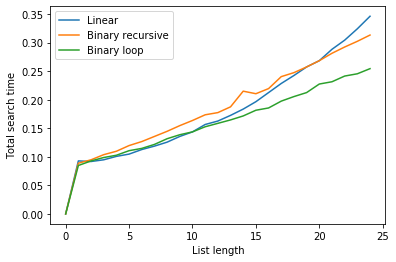

In [17]:
plt.plot(times);
plt.legend(labels=names);
plt.xlabel('List length');
plt.ylabel('Total search time');

**Observation:** if numbers are sometimes repeated, linear search and looped binary search perform very similarly up to n of about 12. Linear search still leads over recursive up to n of 20.